In [32]:
import random
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [35]:
random.seed(1)
np.random.seed(1)
torch.manual_seed(1)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [36]:
input_size = 784
n_classes = 10
learning_rate = 0.001
batch_size = 64
n_epochs = 50

In [37]:
train_dataset = datasets.FashionMNIST(root='/content/drive/MyDrive/datasets/fashionmnist', train=True, transform=transforms.ToTensor(), download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = datasets.FashionMNIST(root='/content/drive/MyDrive/datasets/fashionmnist', train=False, transform=transforms.ToTensor(), download=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

9


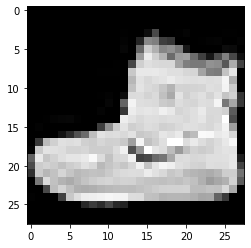

In [38]:
image, label = train_dataset[0]
plt.imshow(image.squeeze(), cmap='gray')
print(label)

## MLP

In [39]:
class MLP(nn.Module):
  def __init__(self, input_size, n_classes):
    super().__init__()
    self.input_layer = nn.Linear(input_size, 100)
    self.hidden_layer_1 = nn.Linear(100, 100)
    self.hidden_layer_2 = nn.Linear(100, 50)
    self.hidden_layer_3 = nn.Linear(50, 25)
    self.output_layer = nn.Linear(25, n_classes)

  def forward(self, X):
    X = self.input_layer(X)
    X = F.relu(X)
    X = self.hidden_layer_1(X)
    X = F.relu(X)
    X = self.hidden_layer_2(X)
    X = F.relu(X)
    X = self.hidden_layer_3(X)
    X = F.relu(X)
    X = self.output_layer(X)
    prob = F.softmax(X, dim = 1)
    return prob

In [40]:
model = MLP(input_size=input_size, n_classes=n_classes).to(device)
print(model)

MLP(
  (input_layer): Linear(in_features=784, out_features=100, bias=True)
  (hidden_layer_1): Linear(in_features=100, out_features=100, bias=True)
  (hidden_layer_2): Linear(in_features=100, out_features=50, bias=True)
  (hidden_layer_3): Linear(in_features=50, out_features=25, bias=True)
  (output_layer): Linear(in_features=25, out_features=10, bias=True)
)


In [41]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [42]:
for epoch in range(n_epochs):
  for batch_idx, (data, targets) in enumerate(train_loader):
    data = data.to(device)
    targets = targets.to(device)
    data = data.reshape(data.shape[0], -1)
    scores = model(data)
    loss = criterion(scores, targets)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if(batch_idx + 1) % 100 == 0:
      print(f'Epoch {epoch+1}/{n_epochs}, Batch{batch_idx+1}, Loss: {loss.item():.2f}')



Epoch 1/50, Batch100, Loss: 1.98
Epoch 1/50, Batch200, Loss: 1.81
Epoch 1/50, Batch300, Loss: 1.81
Epoch 1/50, Batch400, Loss: 1.80
Epoch 1/50, Batch500, Loss: 1.87
Epoch 1/50, Batch600, Loss: 1.83
Epoch 1/50, Batch700, Loss: 1.80
Epoch 1/50, Batch800, Loss: 1.89
Epoch 1/50, Batch900, Loss: 1.76
Epoch 2/50, Batch100, Loss: 1.76
Epoch 2/50, Batch200, Loss: 1.88
Epoch 2/50, Batch300, Loss: 1.84
Epoch 2/50, Batch400, Loss: 1.79
Epoch 2/50, Batch500, Loss: 1.71
Epoch 2/50, Batch600, Loss: 1.71
Epoch 2/50, Batch700, Loss: 1.72
Epoch 2/50, Batch800, Loss: 1.72
Epoch 2/50, Batch900, Loss: 1.64
Epoch 3/50, Batch100, Loss: 1.74
Epoch 3/50, Batch200, Loss: 1.74
Epoch 3/50, Batch300, Loss: 1.71
Epoch 3/50, Batch400, Loss: 1.69
Epoch 3/50, Batch500, Loss: 1.77
Epoch 3/50, Batch600, Loss: 1.60
Epoch 3/50, Batch700, Loss: 1.60
Epoch 3/50, Batch800, Loss: 1.70
Epoch 3/50, Batch900, Loss: 1.66
Epoch 4/50, Batch100, Loss: 1.65
Epoch 4/50, Batch200, Loss: 1.66
Epoch 4/50, Batch300, Loss: 1.73
Epoch 4/50

In [43]:
def get_accuracy(loader, model):
  if loader.dataset.train:
    print('Getting accuracy on training data.')
  else:
    print('Getting accuracy on testing data.')

  n_corrects = 0
  n_samples = 0
  model.eval()

  with torch.no_grad():
    for x, y in loader:
      x = x.to(device)
      y = y.to(device)
      x = x.reshape(x.shape[0], -1)

      scores = model(x)
      _, y_pred = scores.max(1)
      n_corrects += (y_pred == y).sum()
      n_samples += y_pred.size(0)

    print(f'We got {n_corrects}/{n_samples} correct. Accuracy = {float(n_corrects)/float(n_samples)*100.0:.2f}')
  model.train()

In [44]:
get_accuracy(train_loader, model)
get_accuracy(test_loader, model)

Getting accuracy on training data.
We got 52798/60000 correct. Accuracy = 88.00
Getting accuracy on testing data.
We got 8586/10000 correct. Accuracy = 85.86


In [13]:
random.seed(1)
np.random.seed(1)
torch.manual_seed(1)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

## LeNet5

In [14]:
n_classes = 10
learning_rate = 0.001
batch_size = 64
n_epochs = 50

In [45]:
class LeNet5(nn.Module):
  def __init__(self, n_classes):
    super().__init__()
    self.model = nn.Sequential(
        nn.Conv2d(in_channels=1, out_channels=6, kernel_size=4, stride=1),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size=2),
        nn.Conv2d(in_channels=6, out_channels=16, kernel_size=4, stride=1),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size=2),
        nn.Conv2d(in_channels=16, out_channels=120, kernel_size=4, stride=1),
        nn.Tanh(),
        nn.Flatten(),
        nn.Linear(in_features=120, out_features=84),
        nn.Tanh(),
        nn.Linear(in_features=84, out_features=n_classes),
        nn.Softmax(dim=1)
    )
  
  def forward(self, X):
    prob = self.model(X)
    return prob

In [46]:
model_LeNet=LeNet5(n_classes=n_classes).to(device)
print(model_LeNet)

LeNet5(
  (model): Sequential(
    (0): Conv2d(1, 6, kernel_size=(4, 4), stride=(1, 1))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(6, 16, kernel_size=(4, 4), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (6): Conv2d(16, 120, kernel_size=(4, 4), stride=(1, 1))
    (7): Tanh()
    (8): Flatten(start_dim=1, end_dim=-1)
    (9): Linear(in_features=120, out_features=84, bias=True)
    (10): Tanh()
    (11): Linear(in_features=84, out_features=10, bias=True)
    (12): Softmax(dim=1)
  )
)


In [47]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_LeNet.parameters(), lr=learning_rate)

In [48]:
for epoch in range(n_epochs):
    for batch_idx, (data, targets) in enumerate(train_loader):
        data=data.to(device)
        targets=targets.to(device)

        scores=model_LeNet(data)
        loss=criterion(scores, targets)

        optimizer.zero_grad()
        loss.backward()

        optimizer.step()
        
        if (batch_idx+1)%100==0:
            print(f'Epoch {epoch+1}/{n_epochs}, Batch {batch_idx+1},Loss: {loss.item():.2f}')

Epoch 1/50, Batch 100,Loss: 1.81
Epoch 1/50, Batch 200,Loss: 1.81
Epoch 1/50, Batch 300,Loss: 1.69
Epoch 1/50, Batch 400,Loss: 1.69
Epoch 1/50, Batch 500,Loss: 1.72
Epoch 1/50, Batch 600,Loss: 1.75
Epoch 1/50, Batch 700,Loss: 1.72
Epoch 1/50, Batch 800,Loss: 1.71
Epoch 1/50, Batch 900,Loss: 1.65
Epoch 2/50, Batch 100,Loss: 1.65
Epoch 2/50, Batch 200,Loss: 1.64
Epoch 2/50, Batch 300,Loss: 1.71
Epoch 2/50, Batch 400,Loss: 1.62
Epoch 2/50, Batch 500,Loss: 1.77
Epoch 2/50, Batch 600,Loss: 1.71
Epoch 2/50, Batch 700,Loss: 1.69
Epoch 2/50, Batch 800,Loss: 1.69
Epoch 2/50, Batch 900,Loss: 1.74
Epoch 3/50, Batch 100,Loss: 1.63
Epoch 3/50, Batch 200,Loss: 1.61
Epoch 3/50, Batch 300,Loss: 1.75
Epoch 3/50, Batch 400,Loss: 1.62
Epoch 3/50, Batch 500,Loss: 1.71
Epoch 3/50, Batch 600,Loss: 1.66
Epoch 3/50, Batch 700,Loss: 1.69
Epoch 3/50, Batch 800,Loss: 1.62
Epoch 3/50, Batch 900,Loss: 1.66
Epoch 4/50, Batch 100,Loss: 1.58
Epoch 4/50, Batch 200,Loss: 1.61
Epoch 4/50, Batch 300,Loss: 1.64
Epoch 4/50

In [50]:
def get_accuracy(train_loader,model_LeNet):
    if train_loader.dataset.train:
        print("Getting accuracy on training data.")
    else:
        print("Getting accuracy on testing data")
        
    n_corrects=0
    n_samples=0
    model_LeNet.eval()

    with torch.no_grad():
        for x,y in train_loader:
            x = x.to(device)
            y = y.to(device)

            scores=model_LeNet(x)
            _, y_pred=scores.max(1)
            n_corrects += (y_pred == y).sum()
            n_samples += y_pred.size(0)
        print(f'We got {n_corrects}/{n_samples} correct. Accuracy = {float(n_corrects)/float(n_samples)*100.0:.2f}')
    model_LeNet.train()

In [51]:
get_accuracy(train_loader, model_LeNet)
get_accuracy(test_loader, model_LeNet)

Getting accuracy on training data.
We got 55398/60000 correct. Accuracy = 92.33
Getting accuracy on testing data
We got 8730/10000 correct. Accuracy = 87.30
